# Gap junction coupled neurons driven by correlated synaptic input

When a network is driven by continuous current injections each neuron receives a steady depolarisation, however when instead driven by more natural synaptic input, the neurons receive random input. Here the gap junctions are less able to synchronise the input.

This uses the same striatal network as before [FS_network_3.ipynb](FS_network_3.ipynb) but this time it is driven by synaptic input. The difference from [FS_network_4.ipynb](FS_network_4.ipynb) is that in this notebook the synaptic input is correlated.

In [1]:
import os
os.environ["SNUDDA_DATA"] = "../../../../BasalGangliaData/data/"
assert os.path.isdir(os.getenv("SNUDDA_DATA")), f"You need to have BasalGangliaData installed for this example. You can run this example without it, but then do not execute this cell."

network_path = os.path.join("FS_network_5-synaptic-correlated")

In [ ]:
# This should be 100 neurons to match previous run, setting it to 10 FS for speed while developing

from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path, random_seed=1337)
cnc.define_striatum(num_dSPN=0, num_iSPN=0, num_FS=10, num_LTS=0, num_ChIN=0,
                    volume_type="cube", side_len=230e-6)
cnc.write_json()

In [ ]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, verbose=False)
sp.place()

In [ ]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path)
sd.detect()

In [ ]:
from snudda import SnuddaPrune

sp = SnuddaPrune(network_path=network_path)
sp.prune()

In [ ]:
!nrnivmodl $SNUDDA_DATA/neurons/mechanisms

In [5]:
import os
from snudda.input import SnuddaInput
si = SnuddaInput(network_path=network_path, 
                 input_config_file="example-FS-input-5-correlated.json",
                 verbose=False)
si.generate()

Loading 10 neurons with 275 synapses and 298 gap junctions
Writing spikes to FS_network_5-synaptic-correlated/input-spikes.hdf5


In [6]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file)

Loading 10 neurons with 275 synapses and 298 gap junctions


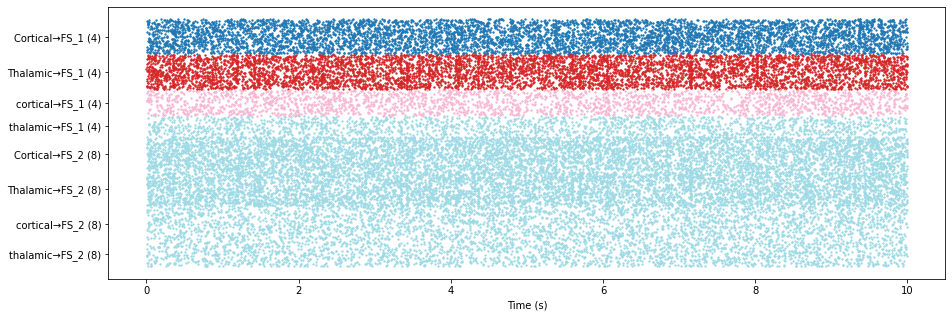

Closing FS_network_5-synaptic-correlated/input-spikes.hdf5


In [7]:
# Plot some example inputs
spi.plot_input("FS", 2, fig_size=(15,5))
spi.close()

In [8]:
!mpiexec -n 2 snudda simulate FS_network_5-synaptic-correlated --time 1 --disableGJ --disableSyn --outputFile FS_network_5-synaptic-correlated/simulation/output-no-gj-no-syn.hdf5

numprocs=2
Creating missing directory FS_network_5-synaptic-correlated/simulation
Created directory FS_network_5-synaptic-correlated/simulation
Using input file FS_network_5-synaptic-correlated/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', disable_gj=True, disable_synapses=True, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation=None, output_file='FS_network_5-synaptic-correlated/simulation/output-no-gj-no-syn.hdf5', path='FS_network_5-synaptic-correlated', profile=False, randomseed=None, record_all=None, record_volt=True, time=1.0, verbose=False)
!!! WE HAVE DISABLED GAP JUNCTIONS !!!
!!! SYNAPSES DISABLED
Using input file FS_network_5-synaptic-correlated/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version o

Loading network info from FS_network_5-synaptic-correlated/network-synapses.hdf5
Loading 10 neurons with 275 synapses and 298 gap junctions
Loading input info from FS_network_5-synaptic-correlated/input-spikes.hdf5
Loading FS_network_5-synaptic-correlated/simulation/output-no-gj-no-syn.hdf5
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Plotted 10 traces (total 10)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/FS-network/FS_network_5-synaptic-correlated/figures/Network-voltage-trace--FS-0-1-2-3-4-5-6-7-8-9.pdf


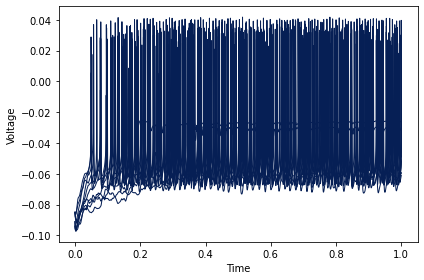

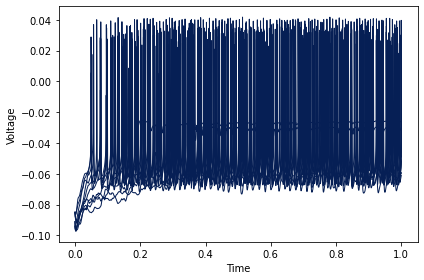

In [9]:
output_file = os.path.join(network_path, "simulation", "output-no-gj-no-syn.hdf5")
network_file = os.path.join(network_path, "network-synapses.hdf5")
input_file = os.path.join(network_path, "input-spikes.hdf5")
from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file = output_file, network_file=network_file, input_file=input_file)
pt.plot_traces(offset=None)

In [10]:
!mpiexec -n 2 snudda simulate FS_network_5-synaptic-correlated --time 1 --disableSyn --outputFile FS_network_5-synaptic-correlated/simulation/output-no-syn.hdf5

numprocs=2
Using input file FS_network_5-synaptic-correlated/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', disable_gj=False, disable_synapses=True, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation=None, output_file='FS_network_5-synaptic-correlated/simulation/output-no-syn.hdf5', path='FS_network_5-synaptic-correlated', profile=False, randomseed=None, record_all=None, record_volt=True, time=1.0, verbose=False)
!!! SYNAPSES DISABLED
Using input file FS_network_5-synaptic-correlated/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', disable_gj=False, disabl

Loading network info from FS_network_5-synaptic-correlated/network-synapses.hdf5
Loading 10 neurons with 275 synapses and 298 gap junctions
Loading input info from FS_network_5-synaptic-correlated/input-spikes.hdf5
Loading FS_network_5-synaptic-correlated/simulation/output-no-syn.hdf5
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Plotted 10 traces (total 10)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/FS-network/FS_network_5-synaptic-correlated/figures/Network-voltage-trace--FS-0-1-2-3-4-5-6-7-8-9.pdf


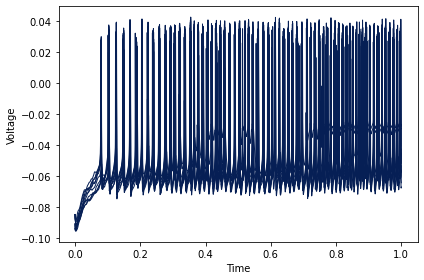

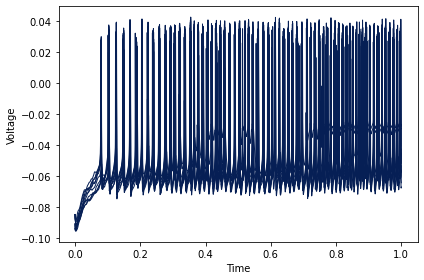

In [11]:
output_file = os.path.join(network_path, "simulation", "output-no-syn.hdf5")
network_file = os.path.join(network_path, "network-synapses.hdf5")
input_file = os.path.join(network_path, "input-spikes.hdf5")
from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file = output_file, network_file=network_file, input_file=input_file)
pt.plot_traces(offset=None)

In [12]:
!mpiexec -n 2 snudda simulate FS_network_5-synaptic-correlated --time 1 --disableGJ --outputFile FS_network_5-synaptic-correlated/simulation/output-no-gj.hdf5

numprocs=2
Using input file FS_network_5-synaptic-correlated/input-spikes.hdf5
Using input file FS_network_5-synaptic-correlated/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', disable_gj=True, disable_synapses=False, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation=None, output_file='FS_network_5-synaptic-correlated/simulation/output-no-gj.hdf5', path='FS_network_5-synaptic-correlated', profile=False, randomseed=None, record_all=None, record_volt=True, time=1.0, verbose=False)
!!! WE HAVE DISABLED GAP JUNCTIONS !!!
args: Namespace(action='simulate', disable_

Loading network info from FS_network_5-synaptic-correlated/network-synapses.hdf5
Loading 10 neurons with 275 synapses and 298 gap junctions
Loading input info from FS_network_5-synaptic-correlated/input-spikes.hdf5
Loading FS_network_5-synaptic-correlated/simulation/output-no-gj.hdf5
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Plotted 10 traces (total 10)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/FS-network/FS_network_5-synaptic-correlated/figures/Network-voltage-trace--FS-0-1-2-3-4-5-6-7-8-9.pdf


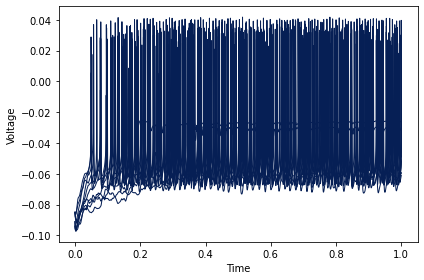

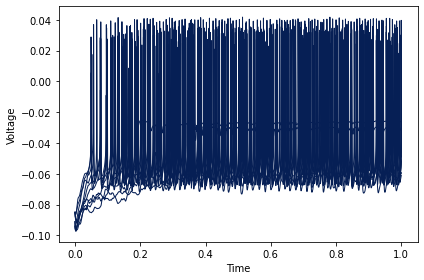

In [13]:
output_file = os.path.join(network_path, "simulation", "output-no-gj.hdf5")
network_file = os.path.join(network_path, "network-synapses.hdf5")
input_file = os.path.join(network_path, "input-spikes.hdf5")
from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file = output_file, network_file=network_file, input_file=input_file)
pt.plot_traces(offset=None)

In [14]:
!mpiexec -n 2 snudda simulate FS_network_5-synaptic-correlated --time 1 --outputFile FS_network_5-synaptic-correlated/simulation/output.hdf5

numprocs=2
Using input file FS_network_5-synaptic-correlated/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', disable_gj=False, disable_synapses=False, exportCoreNeuron=False, input_file=None, mech_dir=None, network_file=None, neuromodulation=None, output_file='FS_network_5-synaptic-correlated/simulation/output.hdf5', path='FS_network_5-synaptic-correlated', profile=False, randomseed=None, record_all=None, record_volt=True, time=1.0, verbose=False)
Using input file FS_network_5-synaptic-correlated/input-spikes.hdf5
NEURON mechanisms already compiled, make sure you have the correct version of NEURON modules.
If you delete x86_64 directory (or nrnmech.dll) then you will force a recompilation of the modules.
args: Namespace(action='simulate', disable_gj=False, disable_synapses=False, exportCore

Loading network info from FS_network_5-synaptic-correlated/network-synapses.hdf5
Loading 10 neurons with 275 synapses and 298 gap junctions
Loading input info from FS_network_5-synaptic-correlated/input-spikes.hdf5
Loading FS_network_5-synaptic-correlated/simulation/output.hdf5
Plotting traces: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Plotted 10 traces (total 10)
Saving to figure /home/hjorth/HBP/Snudda/examples/notebooks/FS-network/FS_network_5-synaptic-correlated/figures/Network-voltage-trace--FS-0-1-2-3-4-5-6-7-8-9.pdf


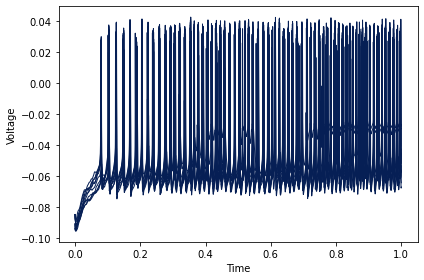

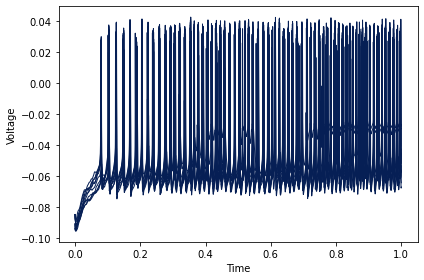

In [15]:
output_file = os.path.join(network_path, "simulation", "output.hdf5")
network_file = os.path.join(network_path, "network-synapses.hdf5")
input_file = os.path.join(network_path, "input-spikes.hdf5")
from snudda.plotting.plot_traces import PlotTraces
pt = PlotTraces(output_file = output_file, network_file=network_file, input_file=input_file)
pt.plot_traces(offset=None)

Loading FS_network_5-synaptic-correlated/simulation/output-no-gj-no-syn.hdf5


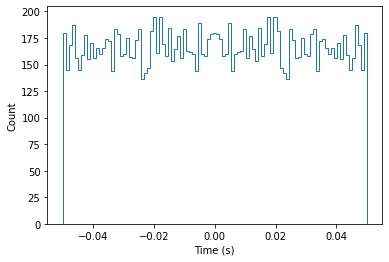

<Figure size 432x288 with 0 Axes>

In [16]:
from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram
pcc0 = PlotCrossCorrelogram(os.path.join(network_path, "simulation", "output-no-gj-no-syn.hdf5"))
pcc0.plot_all_pair_cross_correlogram(neuron_id=None, fig_file_name=os.path.join(network_path, "figures", "FS-cross-corr-no-gj-no-syn.png"))

Loading FS_network_5-synaptic-correlated/simulation/output-no-gj.hdf5


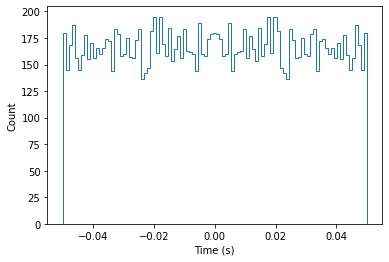

<Figure size 432x288 with 0 Axes>

In [17]:
from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram
pcc1 = PlotCrossCorrelogram(os.path.join(network_path, "simulation", "output-no-gj.hdf5"))
pcc1.plot_all_pair_cross_correlogram(neuron_id=None, fig_file_name=os.path.join(network_path, "figures", "FS-cross-corr-no-gj.png"))

Loading FS_network_5-synaptic-correlated/simulation/output-no-syn.hdf5


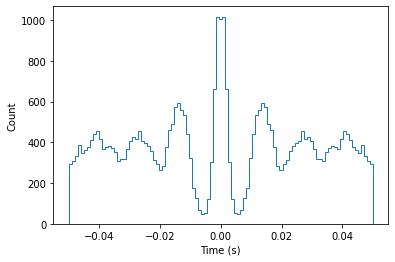

<Figure size 432x288 with 0 Axes>

In [18]:
from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram
pcc1 = PlotCrossCorrelogram(os.path.join(network_path, "simulation", "output-no-syn.hdf5"))
pcc1.plot_all_pair_cross_correlogram(neuron_id=None, fig_file_name=os.path.join(network_path, "figures", "FS-cross-corr-no-syn.png"))

Loading FS_network_5-synaptic-correlated/simulation/output.hdf5


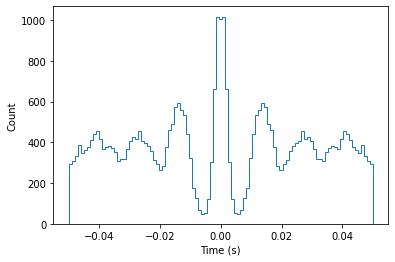

<Figure size 432x288 with 0 Axes>

In [19]:
from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram
pcc2 = PlotCrossCorrelogram(os.path.join(network_path, "simulation", "output.hdf5"))
pcc2.plot_all_pair_cross_correlogram(neuron_id=None, fig_file_name=os.path.join(network_path, "figures", "FS-cross-corr.png"))